<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering: Extrayendo patrones de datos
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Bibliotecas utilizadas
Las versiones de las bibliotecas que usaremos son las siguientes:




In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.9.2
pandas --> 2.2.2
numpy --> 2.0.1
seaborn --> 0.13.2
sklearn --> 1.5.2


In [3]:
URL ='C:\\Users\\USUARIO\\Documents\\BASE DE DATOS\\CC GENERAL.csv'
dataset=pd.read_csv(URL)
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# 2. Obteniendo los *clusters* y entendiendo criterios y métricas de validación

In [4]:
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [5]:
dataset.drop(columns=['CUST_ID','TENURE'],inplace=True)

In [6]:
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      201.802084        139.509787          0.000000  
1     4103.032597       1072.340217          0.222222  
2      622.066742        627.284787          0.000000  
3        0.000000               NaN          0.000000  
4      678.334763        244.791237          0.000000  
...           ...               ...               ...  
8945   325.594462         48.886365          0.500000  
8946   275.861322               NaN          0.000000  
8947    81.270775         82.418369          0.250000  
8948    52.549959         

In [7]:
missing = dataset.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [8]:
dataset.fillna(dataset.median(), inplace=True)

In [9]:
missing = dataset.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [10]:
from sklearn.preprocessing import Normalizer
values=Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [11]:
from sklearn.cluster import KMeans
k_means =KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred=k_means.fit_predict(values)

**2.1 Calculando el coeficiente de Silhoutte**

In [12]:
from sklearn import metrics
labels =k_means.labels_
silhouette=metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645055324417282


# 3. Entendiendo y calculando el índice Davies-Bouldin

In [13]:
dbs=metrics.davies_bouldin_score(values,labels)
print(dbs)

1.0756856623533981


# 4. Entendiendo y calculando el índice Calinski-Harabasz

In [14]:
calinski=metrics.calinski_harabasz_score(values,labels)
print(calinski)

3431.800717231779


# 5. Validando y visualizando los *clusters*

In [15]:
scores=[]
for s in range(3,11):
    score={}
    k_means =KMeans(n_clusters=s,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(values)
    labels =k_means.labels_
    score['N_clusters']=s
    score['silhouette']=metrics.silhouette_score(values, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(values,labels)
    score['Calinski-Harabasz']=metrics.calinski_harabasz_score(values,labels)
    scores.append(score)
table =pd.DataFrame(scores)
table

N_clusters  silhouette  Davies-Bouldin  Calinski-Harabasz
0           3    0.327220        1.309607        3526.440520
1           4    0.348288        1.221188        3528.705231
2           5    0.364543        1.075813        3431.800541
3           6    0.364908        1.045463        3523.497429
4           7    0.327845        1.150915        3398.388472
5           8    0.309416        1.174014        3239.088822
6           9    0.308551        1.194351        3106.980053
7          10    0.305067        1.158208        3017.635329

In [16]:
import numpy as np
random_data=np.random.rand(8950,16)

scores=[]

for s in range(3,11):
    score={}
    k_means =KMeans(n_clusters=s,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(random_data)
    labels =k_means.labels_
    score['N_clusters']=s
    score['silhouette']=metrics.silhouette_score(random_data, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(random_data,labels)
    score['Calinski-Harabasz']=metrics.calinski_harabasz_score(random_data,labels)
    scores.append(score)
random_table =pd.DataFrame(scores)
random_table

N_clusters  silhouette  Davies-Bouldin  Calinski-Harabasz
0           3    0.040379        3.971246         376.324510
1           4    0.040895        3.819483         335.000502
2           5    0.039197        3.527786         301.129819
3           6    0.039583        3.333291         279.909720
4           7    0.039382        3.215654         260.516555
5           8    0.040320        3.055002         248.538594
6           9    0.040085        2.999469         233.341939
7          10    0.040617        2.907668         223.732164

In [17]:
set1,set2,set3 =np.array_split(values,3)
sets =[set1,set2,set3]
scores=[]

for set_ in sets:
    score={}
    n=1
    k_means =KMeans(n_clusters=6,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(set_)
    labels =k_means.labels_
    score['Set']=f'set{n}'
    n +=1
    score['silhouette']=metrics.silhouette_score(set_, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(set_,labels)
    scores.append(score)
estability_table =pd.DataFrame(scores)
estability_table

Set  silhouette  Davies-Bouldin
0  set1    0.364160        1.022778
1  set1    0.364346        1.062952
2  set1    0.372515        1.041678

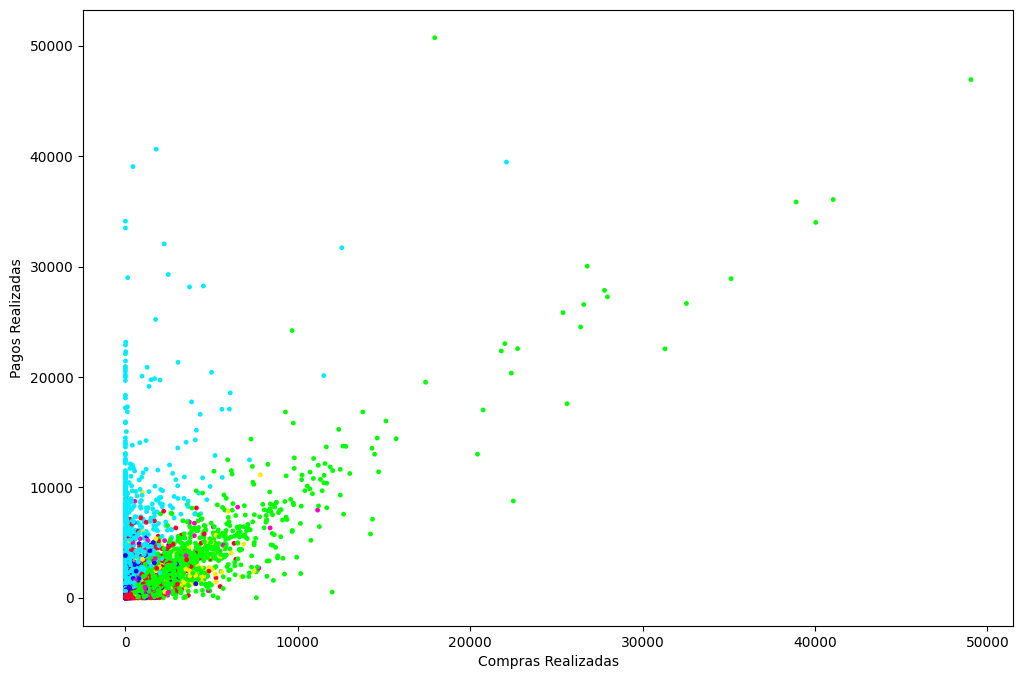

In [39]:
k_means =KMeans(n_clusters=6,n_init=10,max_iter=300)
y_pred=k_means.fit_predict(values)
labels =k_means.labels_
dataset['CLUSTER']=labels
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(dataset['PURCHASES'],dataset['PAYMENTS'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('Compras Realizadas')
plt.ylabel('Pagos Realizadas')
plt.show()

In [40]:
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  CLUSTER  
0      201.802084        139.509787          0.000000        0  
1     4103.032597       1072.340217          0.222222        4  
2      622.066742        627.284787          0.000000        0  
3        0.000000        312.343947          0.000000        0  
4      678.334763        244.791237          0.000000        1  
...           ...               ...               ...      ...  
8945   325.594462         48.886365          0.500000        0  
8946   275.861322        312.343947          0.000000        0  
8

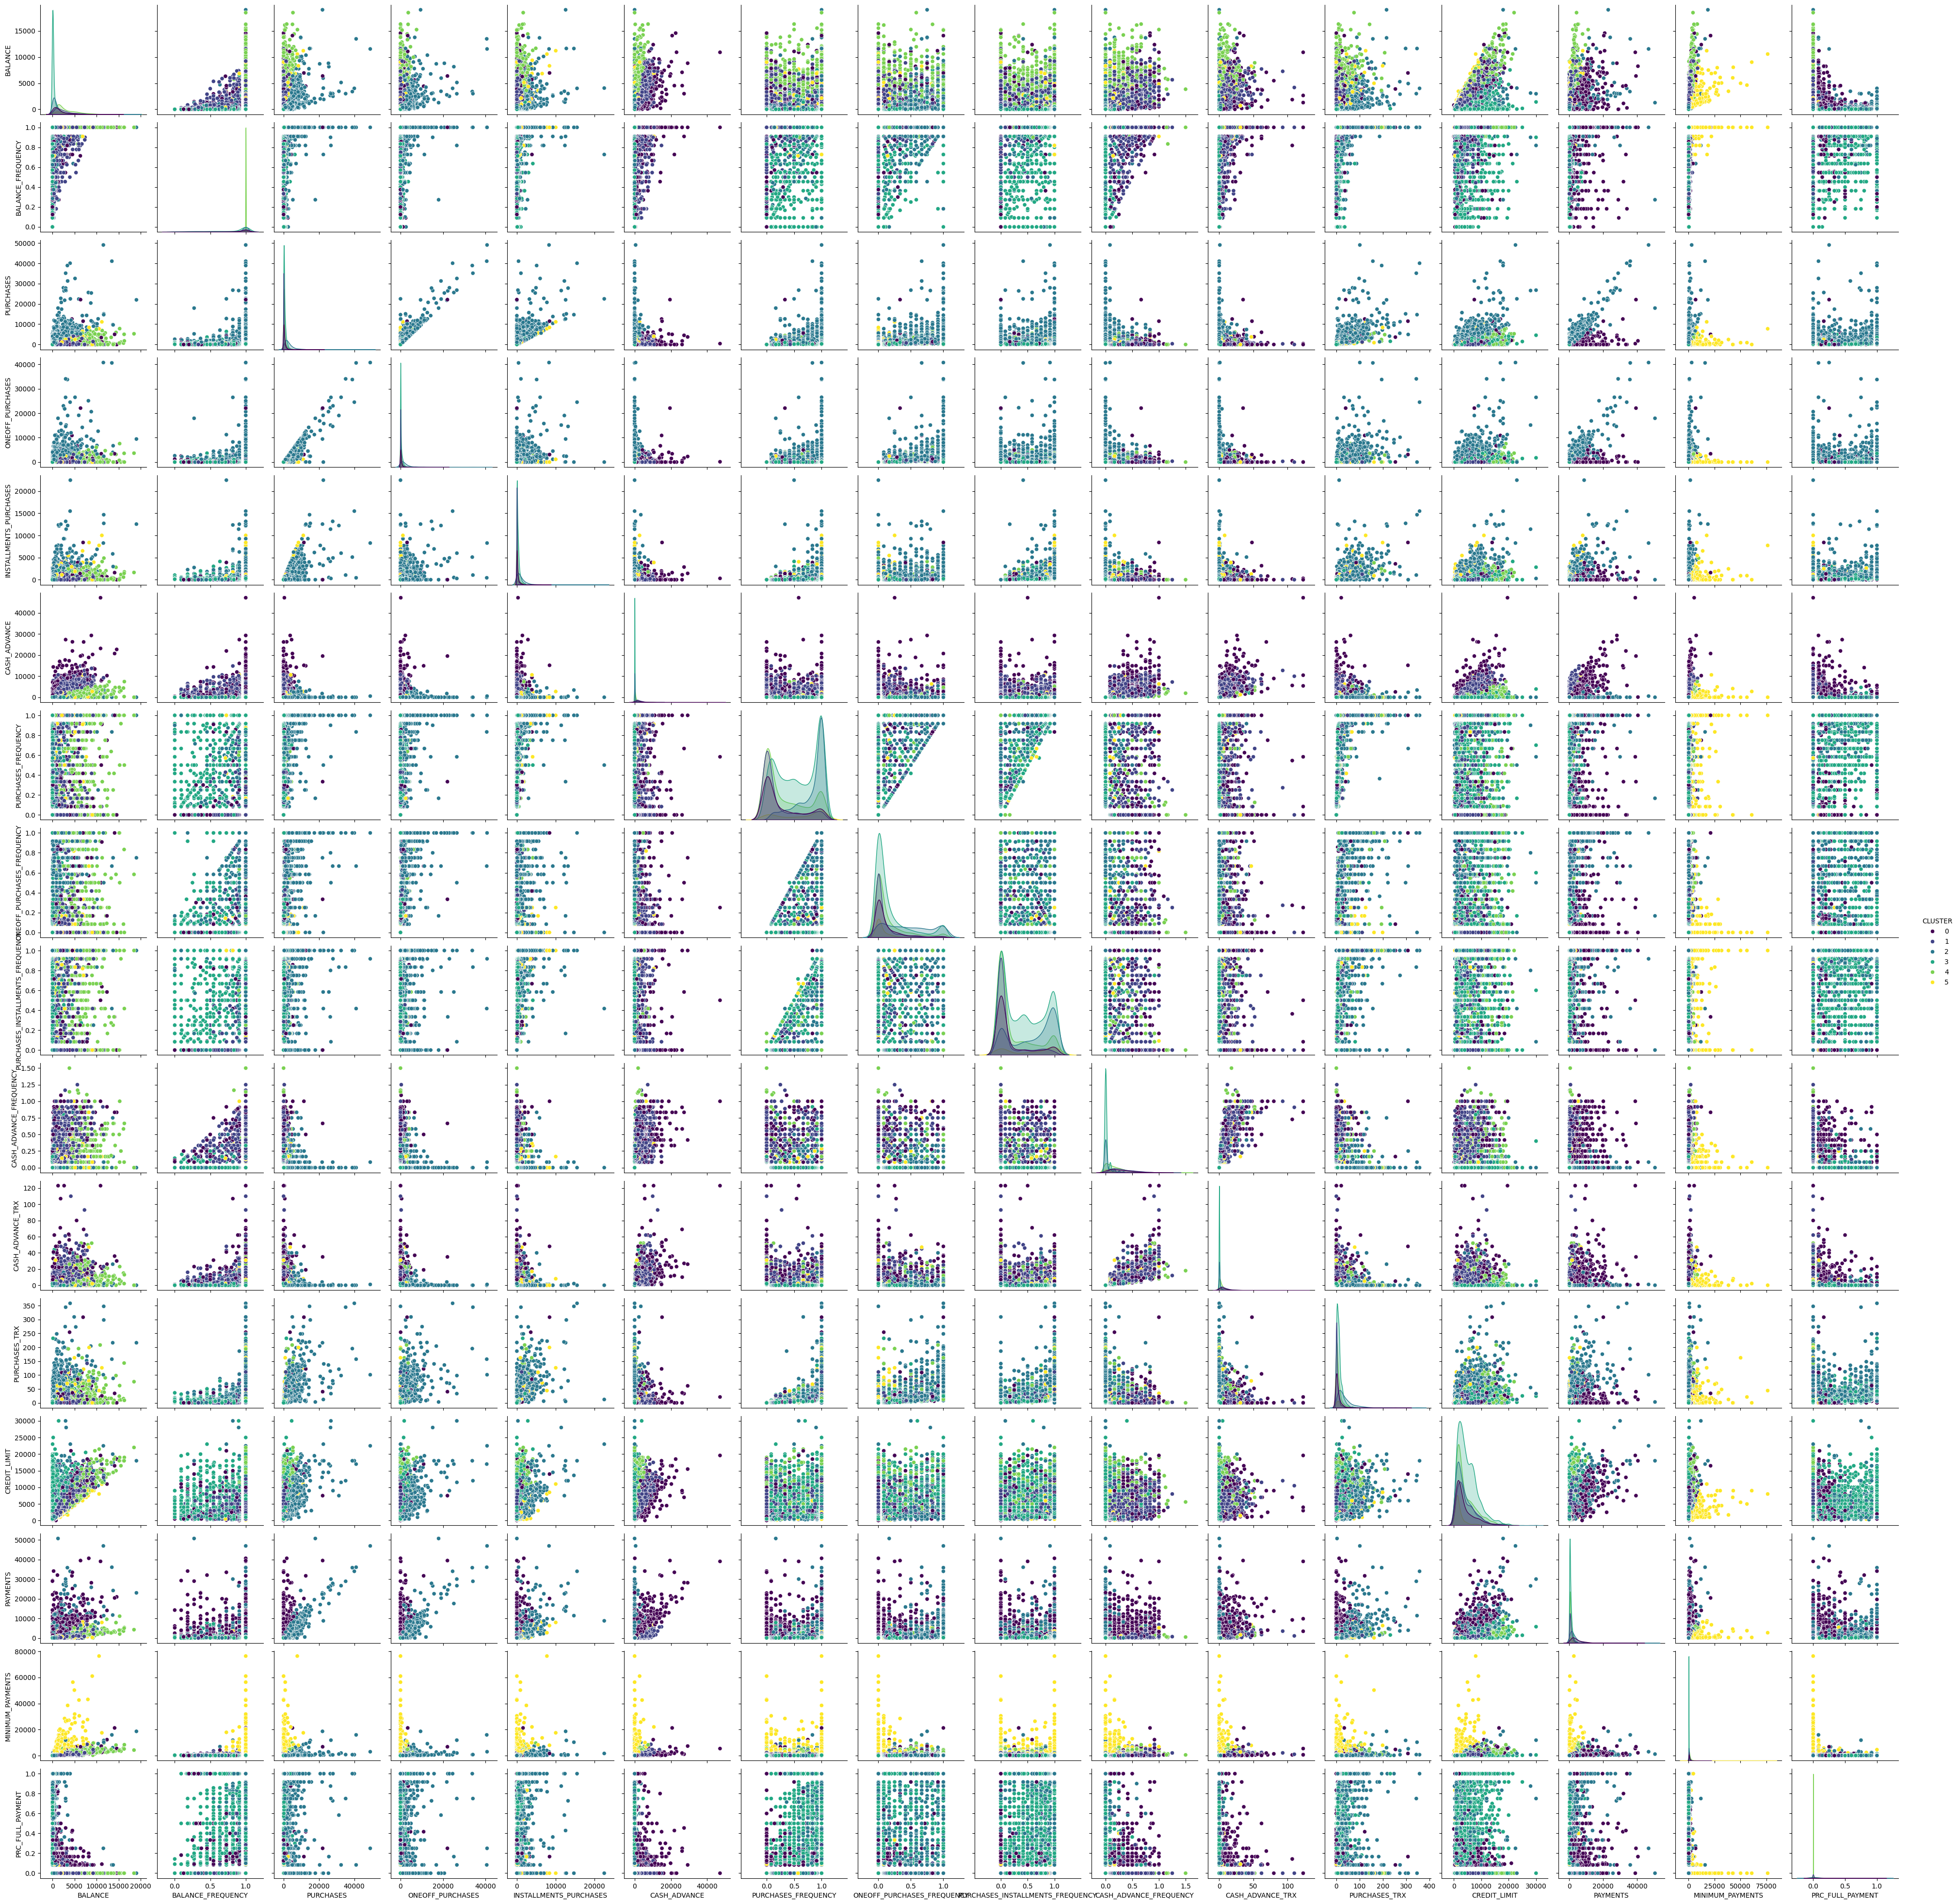

In [19]:
import seaborn as sns
sns.pairplot(dataset[0:],hue='CLUSTER',palette='viridis')

# 6. Entendiendo los valores de los atributos en los *clusters*

In [41]:
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  CLUSTER  
0      201.802084        139.509787          0.000000        0  
1     4103.032597       1072.340217          0.222222        4  
2      622.066742        627.284787          0.000000        0  
3        0.000000        312.343947          0.000000        0  
4      678.334763        244.791237          0.000000        1  
...           ...               ...               ...      ...  
8945   325.594462         48.886365          0.500000        0  
8946   275.861322        312.343947          0.000000        0  
8

In [43]:
dataset.groupby('CLUSTER').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0        3205.0   417.940367   797.134616    0.000000    22.879526   
1        1798.0  3243.112688  2631.095173  114.523682  1355.243912   
2        1486.0  1118.416733  1649.518087    0.000000   208.787132   
3         976.0  1764.451238  1997.702663    0.000000   498.517960   
4        1143.0  2429.889170  2032.506183    1.691842   945.019242   
5         342.0  1959.062058  1816.549846   70.794108  1010.501276   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0          79.432369   380.384776   7533.854422            3205.0  0.774363   
1        2268.945669  4494.530289  18495.558550            1798.0  0.998537   
2         539.366142  1359.237898  19043.138560            1486.0  0.929514   
3        1064.673318  2266.235261  14581.459140             976.0  0.856402   
4        1845.210833  3327.567339  11581.933500            1143.0  0.892026   
5        1301.788287  2150.506925  11209.370760             342.0  0.987365   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
CLUSTER  ...                                                             
0        ...       238.811356   3933.230932           3205.0  0.252514   
1        ...      1470.965794   9642.502512           1798.0  0.000097   
2        ...       497.247095  18621.013310           1486.0  0.284290   
3        ...       890.006121  21235.065300            976.0  0.128996   
4        ...      1026.936888   8644.138069           1143.0  0.008869   
5        ...      8172.035927  76406.207520            342.0  0.022729   

                                                           
              std  min  25%       50%       75%       max  
CLUSTER                                                    
0        0.348758  0.0  0.0  0.000000  0.454545  1.000000  
1        0.002908  0.0  0.0  0.000000  0.000000  0.090909  
2        0.369454  0.0  0.0  0.083333  0.571429  1.000000  
3        0.197731  0.0  0.0  0.083333  0.166667  1.000000  
4        0.044389  0.0  0.0  0.000000  0.000000  0.600000  
5        0.099126  0.0  0.0  0.000000  0.000000  1.000000  

[6 rows x 128 columns]

In [42]:
k_means.cluster_centers_

array([[6.51990576e-02, 2.31513752e-04, 1.22146601e-01, 4.79152249e-02,
        7.43339500e-02, 1.97660075e-02, 1.74899362e-04, 3.38244281e-05,
        1.41994550e-04, 7.36391140e-06, 1.15288439e-04, 2.89149230e-03,
        9.45401598e-01, 1.54861696e-01, 5.57842542e-02, 7.79394483e-05],
       [5.61497766e-01, 3.00438244e-04, 8.34196813e-02, 4.70121417e-02,
        3.64453485e-02, 1.04928769e-01, 8.70788090e-05, 3.31328752e-05,
        6.03604472e-05, 4.30709439e-05, 7.53637426e-04, 1.84510327e-03,
        7.20666070e-01, 1.91657581e-01, 2.10620744e-01, 1.15823537e-07],
       [1.54428975e-01, 2.44344464e-04, 4.43834726e-01, 2.60664385e-01,
        1.83347968e-01, 2.62724092e-02, 2.04773372e-04, 8.98570577e-05,
        1.50682023e-04, 9.46815959e-06, 1.73876943e-04, 6.18814123e-03,
        6.03024926e-01, 4.00711758e-01, 8.38707344e-02, 7.31821775e-05],
       [2.28967095e-01, 2.10417331e-04, 6.85899868e-02, 3.88504414e-02,
        2.97452729e-02, 3.66446279e-01, 5.82391890e-05, 2.271

In [34]:
dataset.drop(columns='CLUSTER',inplace=True)
centroids =pd.DataFrame(k_means.cluster_centers_,columns=dataset.columns)
round(centroids.var(),3).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.065
CREDIT_LIMIT                        0.042
CASH_ADVANCE                        0.041
PAYMENTS                            0.036
BALANCE                             0.030
PURCHASES                           0.022
ONEOFF_PURCHASES                    0.008
INSTALLMENTS_PURCHASES              0.004
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_FREQUENCY                 0.000
BALANCE_FREQUENCY                   0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
PURCHASES_TRX                       0.000
CASH_ADVANCE_TRX                    0.000
CASH_ADVANCE_FREQUENCY              0.000
PRC_FULL_PAYMENT                    0.000
dtype: float64

In [44]:
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  CLUSTER  
0      201.802084        139.509787          0.000000        0  
1     4103.032597       1072.340217          0.222222        4  
2      622.066742        627.284787          0.000000        0  
3        0.000000        312.343947          0.000000        0  
4      678.334763        244.791237          0.000000        1  
...           ...               ...               ...      ...  
8945   325.594462         48.886365          0.500000        0  
8946   275.861322        312.343947          0.000000        0  
8

In [45]:
description=round(dataset.groupby('CLUSTER')[['PURCHASES', 'BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']].describe())

In [46]:
description['N_CUSTOMERS']=dataset.CLUSTER.value_counts()
description

PURCHASES                                                          \
            count    mean     std    min     25%     50%     75%      max   
CLUSTER                                                                     
0          3205.0   629.0   753.0    0.0   135.0   365.0   833.0   6408.0   
1          1798.0   519.0   945.0    0.0     0.0   143.0   585.0   7824.0   
2          1486.0  3330.0  4126.0  101.0  1182.0  2188.0  3913.0  49040.0   
3           976.0   530.0  1252.0    0.0     0.0    70.0   571.0  22102.0   
4          1143.0   239.0   477.0    0.0     0.0     0.0   299.0   4086.0   
5           342.0   856.0  1277.0    0.0   108.0   480.0  1053.0  11147.0   

        BALANCE          ... PAYMENTS MINIMUM_PAYMENTS                         \
          count    mean  ...      max            count    mean     std    min   
CLUSTER                  ...                                                    
0        3205.0   418.0  ...   8946.0           3205.0   221.0   211.0    0.0   
1        1798.0  3243.0  ...  11123.0           1798.0  1150.0  1031.0  152.0   
2        1486.0  1118.0  ...  50721.0           1486.0   538.0  1120.0   14.0   
3         976.0  1764.0  ...  40628.0            976.0   747.0  1145.0    1.0   
4        1143.0  2430.0  ...   7964.0           1143.0   797.0   757.0    9.0   
5         342.0  1959.0  ...   8736.0            342.0  6865.0  9204.0  253.0   

                                         N_CUSTOMERS  
            25%     50%     75%      max              
CLUSTER                                               
0         119.0   171.0   239.0   3933.0        3205  
1         463.0   813.0  1471.0   9643.0        1798  
2         168.0   215.0   497.0  18621.0        1486  
3         222.0   447.0   890.0  21235.0         976  
4         312.0   547.0  1027.0   8644.0        1143  
5        1865.0  3410.0  8172.0  76406.0         342  

[6 rows x 49 columns]

In [54]:
dataset.groupby('CLUSTER')[['PURCHASES', 'BALANCE', 'CREDIT_LIMIT', 'PAYMENTS']].mean()

PURCHASES      BALANCE  CREDIT_LIMIT     PAYMENTS
CLUSTER                                                     
0         628.527417   417.940367   5131.091035   817.212580
1         518.834055  3243.112688   4421.162403  1056.411892
2        3330.059495  1118.416733   4111.615176  3052.726585
3         529.655195  1764.451238   3947.357799  5004.127716
4         238.958031  2429.889170   4475.065617   974.996683
5         856.281725  1959.062058   2198.684211  1339.886001

In [51]:
description

PURCHASES                                                          \
            count    mean     std    min     25%     50%     75%      max   
CLUSTER                                                                     
0          3205.0   629.0   753.0    0.0   135.0   365.0   833.0   6408.0   
1          1798.0   519.0   945.0    0.0     0.0   143.0   585.0   7824.0   
2          1486.0  3330.0  4126.0  101.0  1182.0  2188.0  3913.0  49040.0   
3           976.0   530.0  1252.0    0.0     0.0    70.0   571.0  22102.0   
4          1143.0   239.0   477.0    0.0     0.0     0.0   299.0   4086.0   
5           342.0   856.0  1277.0    0.0   108.0   480.0  1053.0  11147.0   

        BALANCE          ... PAYMENTS MINIMUM_PAYMENTS                         \
          count    mean  ...      max            count    mean     std    min   
CLUSTER                  ...                                                    
0        3205.0   418.0  ...   8946.0           3205.0   221.0   211.0    0.0   
1        1798.0  3243.0  ...  11123.0           1798.0  1150.0  1031.0  152.0   
2        1486.0  1118.0  ...  50721.0           1486.0   538.0  1120.0   14.0   
3         976.0  1764.0  ...  40628.0            976.0   747.0  1145.0    1.0   
4        1143.0  2430.0  ...   7964.0           1143.0   797.0   757.0    9.0   
5         342.0  1959.0  ...   8736.0            342.0  6865.0  9204.0  253.0   

                                         N_CUSTOMERS  
            25%     50%     75%      max              
CLUSTER                                               
0         119.0   171.0   239.0   3933.0        3205  
1         463.0   813.0  1471.0   9643.0        1798  
2         168.0   215.0   497.0  18621.0        1486  
3         222.0   447.0   890.0  21235.0         976  
4         312.0   547.0  1027.0   8644.0        1143  
5        1865.0  3410.0  8172.0  76406.0         342  

[6 rows x 49 columns]

# 7. Interpretando los *clusters*

Cluster 0 Más realiza gastos con compras.
Cluster 1 Menos saldo disponible para compras. Mejor pagan. Tiene un límite de crédito más alto
Cluster 2 Peores para Pagar
Cluster 3 Solicitan avances en efectivo.Pagan Moderadamente.
Cluster 4 Tienen límite de crédito más bajo.
Cluster 5 Menos gastos con compras.Solicitan más avances en efectivo.Pagan mal

In [53]:
dataset.groupby('CLUSTER')[['PRC_FULL_PAYMENT']].mean()

PRC_FULL_PAYMENT
CLUSTER                  
0                0.252514
1                0.000097
2                0.284290
3                0.128996
4                0.008869
5                0.022729